In [11]:
import sys 
import os
import numpy as np
import matplotlib.pyplot as plt
from sswm import SM_C_H
from create_figs import *
import warnings
warnings.simplefilter("ignore")

**Description**

This notebook executes scripts in this repository to generate theoretical figures of plant water use strategies in:

M Bassiouni, S Manzoni, and G Vico (in prep). Optimal plant water use strategies explain soil moisture variability.


In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<img  src="graphical_summary.png">

**Figure** 1 Visual summary. (a) A series of flux-gradient relations describes the soil-plant-atmosphere continuum (SPAC). Water flux along the SPAC depends on local water potential status from the soil ($ψ_s$) to the canopy ($ψ_c$) and conductances of the soil and root ($K_{SR}$), plant stem ($K_P$), and canopy ($G_C$). (b) We reduce the complexity of the SPAC by combining variables into four non-dimensional Π groups and express the ratio ($β$, Eq. 2) between transpiration ($T$) and atmospheric evaporative demand ($E_0$) as a function of soil saturation ($s$) and Π groups. (c) The shape of this function varies with plant water uptake capacity and can be approximated by three shape parameters ($f_{ww}$, $s^*$, $s_w$ Eq. 4-5) and an overall index reflecting water use strategies from stress averse to stress tolerant ($σ$, Eq. 6). We implement $β(s,Π)$ in a water balance forced with stochastic rainfall (with average depth α and frequency $λ$) and obtain soil saturation probability distributions ($p(s)$, Eq. 8), as well as long-term mean transpiration ($〈T〉$, Eq. 10) and risk of water stress ($〈θ〉$, Eq. 12) as a function of $α$, $λ$, $Π$ groups, soil texture, and rooting depth. (d) We test if parameters that best-fit empirical p(s) derived from soil saturation observations also optimize plant water use performance in terms of maximizing plant water uptake weighted by risks of water stress (ε, Eq. 13).

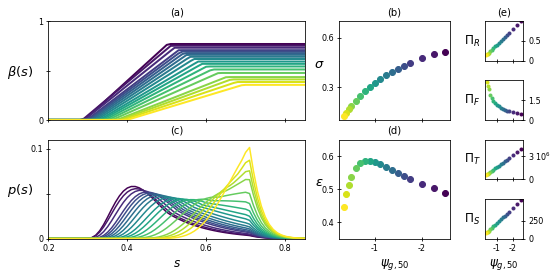

In [13]:
params = get_baseline_params()
pgtest = [2.5, 2.25, 2, 1.75, 1.625, 1.5, 1.375, 1.25, 1.125, 1, 
          0.9, 0.8, 0.7, 0.6, 0.5, 0.45, 0.4, 0.35] 
plot_Pg50_range(params, pgtest, 'Pg50', '$\psi_{g,50}$', legend=0, cmap ='viridis')

**Figure 2** Water use strategies with varying stomatal sensitivity represented by the water potential at 50% loss of stomatal conductance ($ψ_{g,50}$). (a) Fraction of transpiration to potential atmospheric demand (β, Eq. 2), as a function of soil saturation (s). (b) index of plant water uptake capacity (σ, Eq. 6); (c) soil saturation probability density function (p(s), Eq. 8); (d) plant water use performance (ε, Eq. 13); (e) effect of $ψ_{g,50}$ on non-dimensional groups: hydraulic risk tolerance ($Π_R$), plant water flux control ($Π_F$), soil-to-root water transport capacity ($Π_T$), and soil suitability ($Π_s$). Prescribed parameter values are for a temperate broadleaf forest with loam soil texture (Table 1). $ψ_{g,50}$ ranges from -0.35 (yellow) to -2.5 (purple) MPa according to the color scale on the x-axis in subplots b, d, and e.

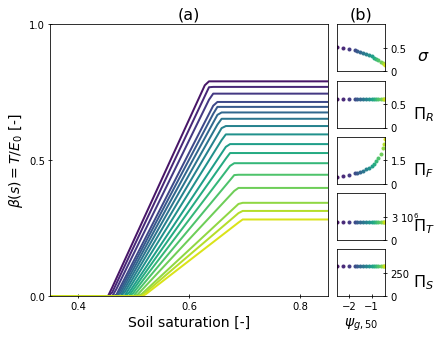

In [17]:
params = get_baseline_params()
plot_SI_pi_range_s(params, pgtest, 'Pg50', '$\psi_{g,50}$', 'PiF', cmap ='viridis')

**Figure 3** Effect of plant water flux control ($Π_F$) on (a) the fraction of transpiration (T) to potential atmospheric demand ($E_0$) as a function of soil saturation (β(s)), (b) plant water uptake capacity (σ) representing the normalized area of the β(s) function; and non-dimensional groups for hydraulic risk tolerance ($Π_R$), plant water flux control ($Π_F$), soil-to-root water transport capacity ($Π_T$), and soil suitability ($Π_s$). We obtain water use strategies for different values of $Π_F$ by varying the water potential at 50% loss of stomatal conductance ($ψ_{g,50}$) and maintaining other 3 $Π$ groups constant by adjusting $Π_R$ with the water potential at 50% loss of xylem conductance ($ψ_{x,50}$), $Π_T$ with maximum soil-root conductance ($K_{SR,max}$), and $Π_S$ with soil  water potential near saturation ($ψ_{s,sat}$) to counterbalance the effect of varying $ψ_{g,50}$. Baseline parameter values are in Table 1. $ψ_{g,50}$ ranges from -0.35 (yellow) to -2.5 (purple) MPa according to the color scale on the x-axis in subplots b.

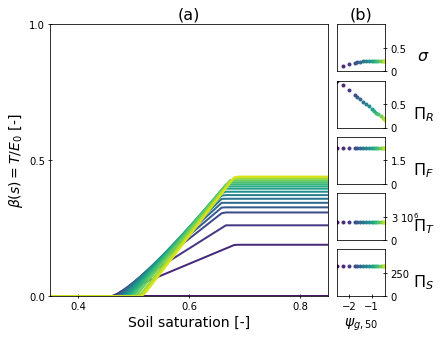

In [25]:
params = get_baseline_params()
params['k_xl_max'] = params['k_xl_max']/3
plot_SI_pi_range_s(params, pgtest, 'Pg50', '$\psi_{g,50}$', 'PiR', cmap ='viridis')

**Figure 4** Effect of hydraulic risk tolerance ($Π_R$) on (a) the fraction of transpiration ($T$) to potential atmospheric demand ($E_0$) as a function of soil saturation (β(s)), (b) plant water uptake capacity (σ) representing the normalized area of the β(s) function; and non-dimensional groups for hydraulic risk tolerance ($Π_R$), plant water flux control ($Π_F$), soil-to-root water transport capacity ($Π_T$), and soil suitability ($Π_s$). We obtain water use strategies for different values of $Π_R$ by varying the water potential at 50% loss of stomatal conductance ($ψ_{g,50}$) and maintaining other 3 $Π$ groups constant by adjusting $Π_F$ with maximum plant xylem conductance ($K_{P,max}$), $Π_T$ with maximum soil-root conductance ($K_{SR,max}$), and $Π_S$ with soil  water potential near saturation ($ψ_{s,sat}$) to counterbalance the effect of varying $ψ_{g,50}$. Baseline parameter values are in Table 1, except we divide maximum xylem conductance by 3 to exaggerate the range of β(s) patterns. $ψ_{g,50}$ ranges from -0.35 (yellow) to -2.5 (purple) MPa according to the color scale on the x-axis in subplots b.

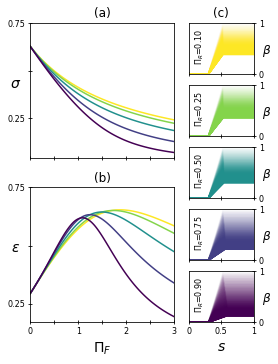

In [26]:
params = get_baseline_params()
piF_l = np.linspace(0 ,3, 121)
piR_l = [0.1, 0.25, 0.5, 0.75, 0.90]
plot_piF_piR_range(params, piF_l, piR_l)

**Figure 6** Effect of plant water flux control ($Π_F$) and hydraulic risk tolerance ($Π_R$) with constant water potential at 50% loss of stomatal conductance ($ψ_{g,50}$ ) on (a) index of plant water uptake capacity ($σ$, Eq. 6); (b) plant water use performance ($ε$, Eq. 13); (c) fraction of transpiration to potential atmospheric water demand ($β$, Eq. 2) as a function of soil saturation (s), when varying $Π_R$ (increasing from top (yellow, $Π_R$ = 0.10) to bottom (purple, $Π_R$ = 0.90)) and $Π_F$ (increasing from darker ($Π_F$ ≈ 0) to lighter ($Π_F$ = 3) colors in each sub-panel). Prescribed baseline parameter values are for a temperate broadleaf forest with loam soil texture (Table 1) and varying maximum plant conductivity ($K_{p,max}$) and water potential at 50% loss of xylem conductance ($ψ_{g,50}$ ) to change $Π_F$ and $Π_R$, respectively.

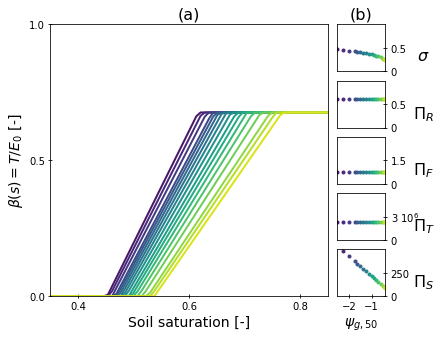

In [15]:
pgtest = [-2.5, -2.25, -2, -1.75, -1.625, -1.5, -1.375, -1.25, -1.125, -1, 
          -0.9, -0.8, -0.7, -0.6, -0.5, -0.45, -0.4]
params = get_baseline_params()
plot_SI_pi_range_s(params, pgtest, 'Pg50', '$\psi_{g,50}$', 'PiS', cmap ='viridis')

**Figure S2** Effect of soil suitability ($Π_s$) on (a) the fraction of transpiration ($T$) to potential atmospheric demand ($E_0$) as a function of soil saturation ($β(s)$), (b) plant water uptake capacity ($σ$) representing the normalized area of the $β(s)$ function; and non-dimensional groups for hydraulic risk tolerance ($Π_R$), plant water flux control ($Π_F$), soil-to-root water transport capacity ($Π_T$), and soil suitability ($Π_s$). We obtain water use strategies for different values of $Π_s$ by varying the water potential at 50% loss of stomatal conductance ($ψ_{g,50}$) from -0.4 to -2.5 MPa (yellow to purple) MPa and maintaining other 3 $Π$ groups constant by adjusting Π_R with the water potential at 50% loss of xylem conductance ($ψ_{x,50}$), $Π_F$ with maximum plant xylem conductance ($K_{P,max}$), and Π_T with maximum soil-root conductance ($K_{SR,max}$) to counterbalance the effect of varying $ψ_{g,50}$. Baseline parameter values are in Table 1.

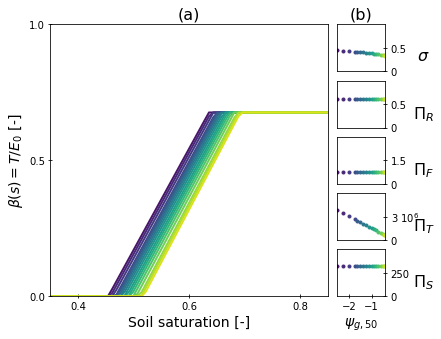

In [16]:
params = get_baseline_params()
plot_SI_pi_range_s(params, pgtest, 'Pg50', '$\psi_{g,50}$', 'PiT', cmap ='viridis')

**Figure S3** Effect of soil-root transport capacity ($Π_T$) on (a) the fraction of transpiration ($T$) to potential atmospheric demand ($E_0$) as a function of soil saturation ($β(s)$), (b) plant water uptake capacity ($σ$) representing the normalized area of the $β(s)$ function; and non-dimensional groups for hydraulic risk tolerance ($Π_R$), plant water flux control ($Π_F$), soil-to-root water transport capacity ($Π_T$), and soil suitability ($Π_s$). We obtain water use strategies for different values of $Π_T$ by varying the water potential at 50% loss of stomatal conductance ($ψ_{g,50}$) from -0.4 to -2.5 (yellow to purple) MPa and maintaining other 3 $Π$ groups constant by adjusting $Π_R$ with the water potential at 50% loss of xylem conductance ($ψ_{x,50}$), $Π_F$ with maximum plant xylem conductance ($K_{P,max}$), and Π_S with soil  water potential near saturation ($ψ_{s,sat}$) to counterbalance the effect of varying $ψ_{g,50}$. Baseline parameter values are in Table 1

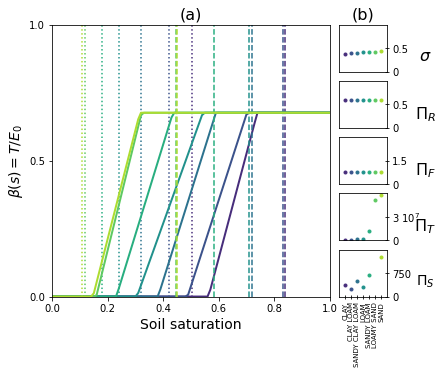

In [19]:
plot_SI_soiltex(soil_tex_list, cmap='viridis')

**Figure S4** Effect of soil texture on (a) the fraction of transpiration ($T$) to potential atmospheric demand ($E_0$) as a function of soil saturation ($β(s)$), (b) plant water uptake capacity ($σ$) representing the normalized area of the $β(s)$ function; and non-dimensional groups for hydraulic risk tolerance ($Π_R$), plant water flux control ($Π_F$), soil-to-root water transport capacity ($Π_T$), and soil suitability ($Π_s$). We vary 4 parameters together, including soil porosity, soil water potential near soil saturation, soil hydraulic conductance, and soil pore distribution for each soil texture (Rawls et al., 1982) from most to least draining soils (yellow to purple). We calculate soil saturation at the hygroscopic point ($s_h$, dotted line) at -10 MPa and at field capacity ($s_{fc}$, dashed line) at -0.03 MPa based on soil texture and use other climate and vegetation parameter values in Table 1.

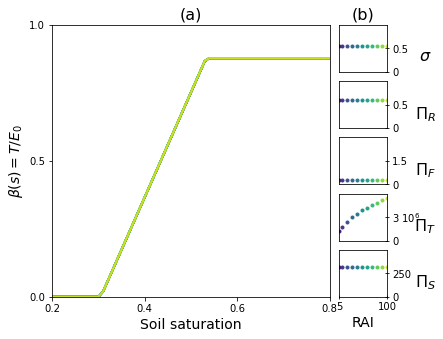

In [20]:
params = get_baseline_params()
params['k_xl_max'] = params['k_xl_max']*3
raitest = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plot_SI_v_range(params, raitest, 'RAI', 'RAI', legend=0, cmap ='viridis')

**Figure S5** Figure S5 Effect of root area index (RAI) on (a) the fraction of transpiration ($T$) to potential atmospheric demand ($E_0$) as a function of soil saturation ($β(s)$), (b) plant water uptake capacity ($σ$) representing the normalized area of the $β(s)$ function; and non-dimensional groups for hydraulic risk tolerance ($Π_R$), plant water flux control ($Π_F$), soil-to-root water transport capacity ($Π_T$), and soil suitability ($Π_s$). We obtain water use strategies with root area index ($RAI$) ranging from 5 to 100 m2 m-2 (yellow to purple) and baseline parameter values in Table 1, except we multiply xylem conductance by 3 to test limitations of soil-root conductance in a more extreme case.